# Bitcoin - ドル 週足 メジアン統計

In [12]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pingouin as pg
import seaborn as sns
import yfinance as yf

code = 'BTC-USD'
symbol = code
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-28 00:00:00+00:00,47062.148438,47512.027344,44403.140625,46453.566406,126241063197,0.0,0.0
2022-04-04 00:00:00+00:00,46445.273438,47106.140625,42021.207031,42207.671875,188557001876,0.0,0.0
2022-04-11 00:00:00+00:00,42201.039062,42424.589844,39373.058594,39716.953125,174652159709,0.0,0.0
2022-04-18 00:00:00+00:00,39721.203125,42893.582031,38696.191406,39469.292969,184314843516,0.0,0.0
2022-04-25 00:00:00+00:00,39472.605469,40713.890625,37585.789062,38469.093750,216681007567,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-03 00:00:00+00:00,94248.421875,94429.750000,80052.484375,80601.039062,351467410238,0.0,0.0
2025-03-10 00:00:00+00:00,80597.148438,85263.289062,76624.250000,82579.687500,245099235090,0.0,0.0
2025-03-17 00:00:00+00:00,82576.335938,87443.265625,81179.992188,86054.375000,154637791297,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-30 00:00:00+00:00,6430.606445,7088.247559,6202.373535,6791.129395,222466444545,0.0,0.0
2020-04-06 00:00:00+00:00,6788.049805,7427.939453,6782.889648,6971.091797,274123270580,0.0,0.0
2020-04-13 00:00:00+00:00,6965.616699,7280.521973,6555.504395,7189.424805,248073118275,0.0,0.0
2020-04-20 00:00:00+00:00,7186.873535,7700.594238,6834.442383,7679.867188,247735013853,0.0,0.0
2020-04-27 00:00:00+00:00,7679.418945,9440.650391,7679.418945,8897.468750,327820350244,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-03 00:00:00+00:00,94248.421875,94429.750000,80052.484375,80601.039062,351467410238,0.0,0.0
2025-03-10 00:00:00+00:00,80597.148438,85263.289062,76624.250000,82579.687500,245099235090,0.0,0.0
2025-03-17 00:00:00+00:00,82576.335938,87443.265625,81179.992188,86054.375000,154637791297,0.0,0.0


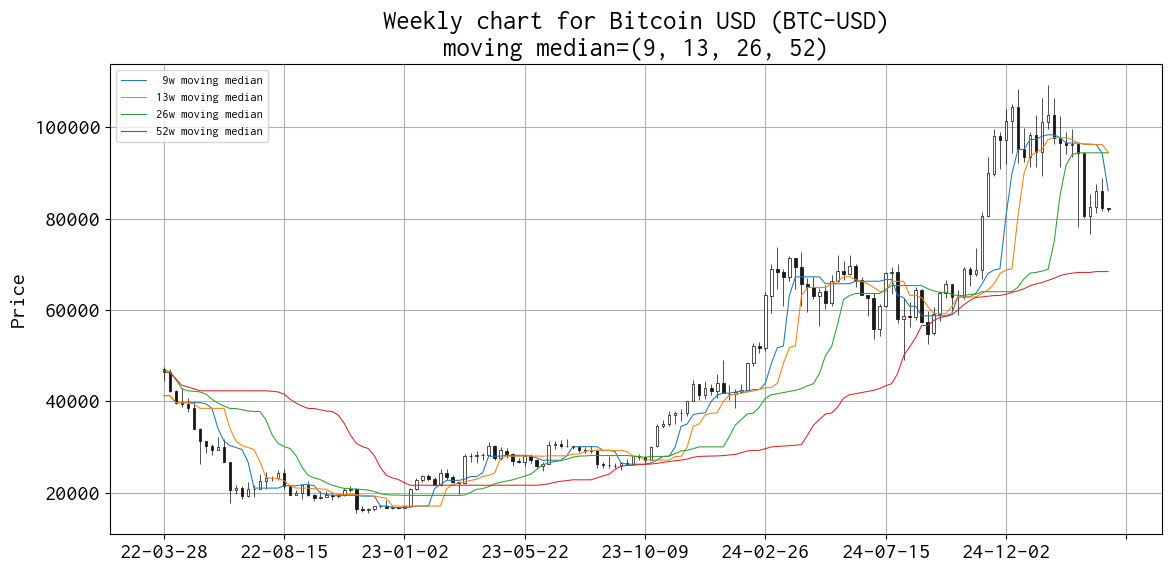

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()
apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmoving median=(9, 13, 26, 52)' % (ticker.info['longName'], symbol))

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('report_weekly_chart_robust_%s.png' % code)
plt.show()

In [4]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-31 00:00:00+00:00,82353.914062,82384.632812,81366.390625,82002.867188,18151557120,0.0,0.0


In [5]:
df.tail(2)['Close']

Date
2025-03-24 00:00:00+00:00    82334.523438
2025-03-31 00:00:00+00:00    82002.867188
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-03-24 00:00:00+00:00          NaN
2025-03-31 00:00:00+00:00   -331.65625
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(9).median().tail(1)

Date
2025-03-31 00:00:00+00:00    86054.375
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(13).median().tail(1)

Date
2025-03-31 00:00:00+00:00    94488.4375
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(26).median().tail(1)

Date
2025-03-31 00:00:00+00:00    94368.394531
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(52).median().tail(1)

Date
2025-03-31 00:00:00+00:00    68386.980469
Name: Close, dtype: float64

## ヒストグラム

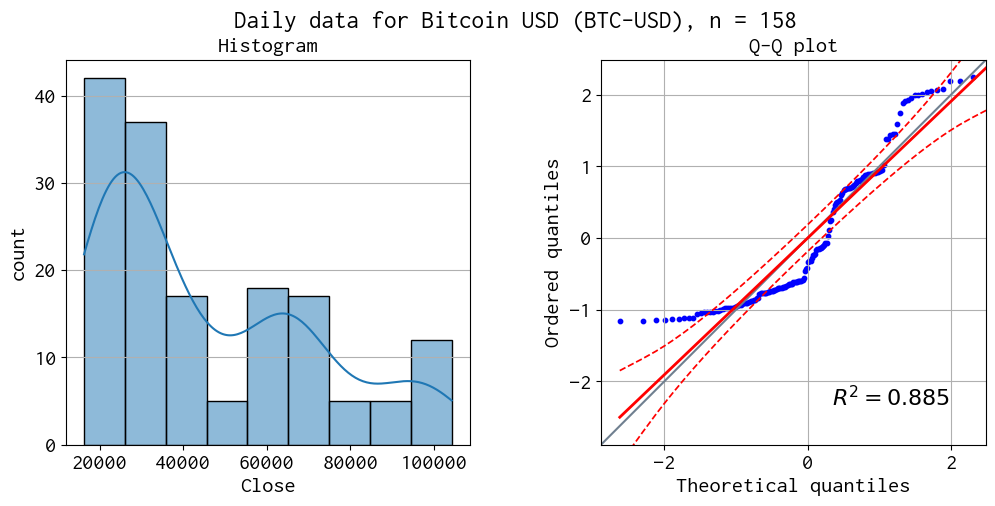

In [13]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_daily_histogram_qqplot_%s.png' % code)
plt.show()